观测气象数据：
（1）shape:
（2）时间跨度：

网格气象数据：
（1）shape:
（2）时间跨度：

In [1]:
# using pandas to process data
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
def get_station_locations(stations_df):
    '''
    Get all the locations of stations in stations_df.
    Agrs : 
        stations_df : a dataframe of all station data.
    Return : 
        A list of (station_name, (longitude, latitude))
    '''
    
    locations = []
    station_names = []
    
    if 'station_id' in stations_df.columns:
        station_column_name = 'station_id'
    elif 'stationId' in stations_df.columns:
        station_column_name = 'stationId'
    else :
        print("Can not find station name!")
    
    for j in stations_df.index:
        station_name = stations_df[station_column_name][j]
        if station_name not in station_names:
            station_names.append(station_name)
            longitude = stations_df['longitude'][j]
            latitude = stations_df['latitude'][j]
            location = (longitude, latitude)
            locations.append((station_name, location))
    
    return locations

In [7]:
def get_location_lists(locations):
    '''
    Get location list from locations.
    Args : 
        A list with element shape (station_name, (longitude, latitude)).
    Return : 
        Two lists of longitudes and latitudes.
    '''
    longitudes = []
    latitudes = []
    
    for i in range(len(locations)):
        _, (longitude, latitude) = locations[i]
        longitudes.append(longitude)
        latitudes.append(latitude)
        
    return longitudes, latitudes

In [8]:
def find_nearst_meo_station_name(aq_location, meo_locations):
    '''
    From meo stations ans grid meos stations, find the nearest meo station of aq station.
    Args :
        aq_location : an aq station information of (station_name, (longitude, latitude))
        meo_locations : meo information, list of ((station_name, (longitude, latitude)))
    '''
    nearest_station_name = ""
    nearest_distance = 1e10
    
    aq_station_longitude = aq_location[1][0]
    aq_station_latitude = aq_location[1][1]
    
    for station_name, (longitude, latitude) in meo_locations:
        dis = np.sqrt((longitude-aq_station_longitude)**2 + (latitude-aq_station_latitude)**2)
        if dis < nearest_distance:
            nearest_distance = dis
            nearest_station_name = station_name
    
    return nearest_station_name

In [3]:
# 加载网格气象站点经纬度：ID|latitude|longtitude
columns_name = ['stationId', 'latitude', 'longitude']
grid_meo_locations = pd.read_csv('data/Beijing_grid_weather_station.csv',header=None, names=columns_name)
grid_meo_locations.head()

,stationId,latitude,longitude
0,beijing_grid_000,39.0,115.0
1,beijing_grid_001,39.1,115.0
2,beijing_grid_002,39.2,115.0
3,beijing_grid_003,39.3,115.0
4,beijing_grid_004,39.4,115.0


In [4]:
# 加载观测站网格数据：
observed_meo_data = pd.read_csv('data/observedWeather_201701-201801.csv')
observed_meo_data.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [5]:
# 加载控制质量站点数据：
aq_station_locations = pd.read_csv('data/Beijing_AirQuality_Stations_en.csv')
aq_station_locations.head()

,stationId,latitude,longitude,stationType
0,dongsi_aq,39.929,116.417,Urban Stations
1,tiantan_aq,39.886,116.407,Urban Stations
2,guanyuan_aq,39.929,116.339,Urban Stations
3,wanshouxigong_aq,39.878,116.352,Urban Stations
4,aotizhongxin_aq,39.982,116.397,Urban Stations


# 1. 站点位置
(1)observed_weather_locations:There are 18 meo stations in Beijing;

(2)grid_weather_locations:There are 651 grid meo stations in Beijing;

(3)aq_locations:There are 35 air quality stations in Beijing. 

In [9]:
meo_locations = get_station_locations(observed_meo_data)
grid_meo_locations = get_station_locations(grid_meo_locations)
aq_locations = get_station_locations(aq_station_locations)

print('There are %d meo stations in Beijing.'%(len(meo_locations)))
print('There are %d grid meo stations in Beijing.'%(len(grid_meo_locations)))
print('There are %d air quality stations in Beijing.'%(len(aq_station_locations)))

There are 18 meo stations in Beijing.
There are 651 grid meo stations in Beijing.
There are 35 air quality stations in Beijing.


In [10]:
meo_locations_longitudes, meo_locations_latitudes = get_location_lists(meo_locations)
grid_meo_locations_longitudes, grid_meo_locations_latitudes = get_location_lists(grid_meo_locations)
aq_locations_longitudes, aq_locations_latitudes = get_location_lists(aq_locations)

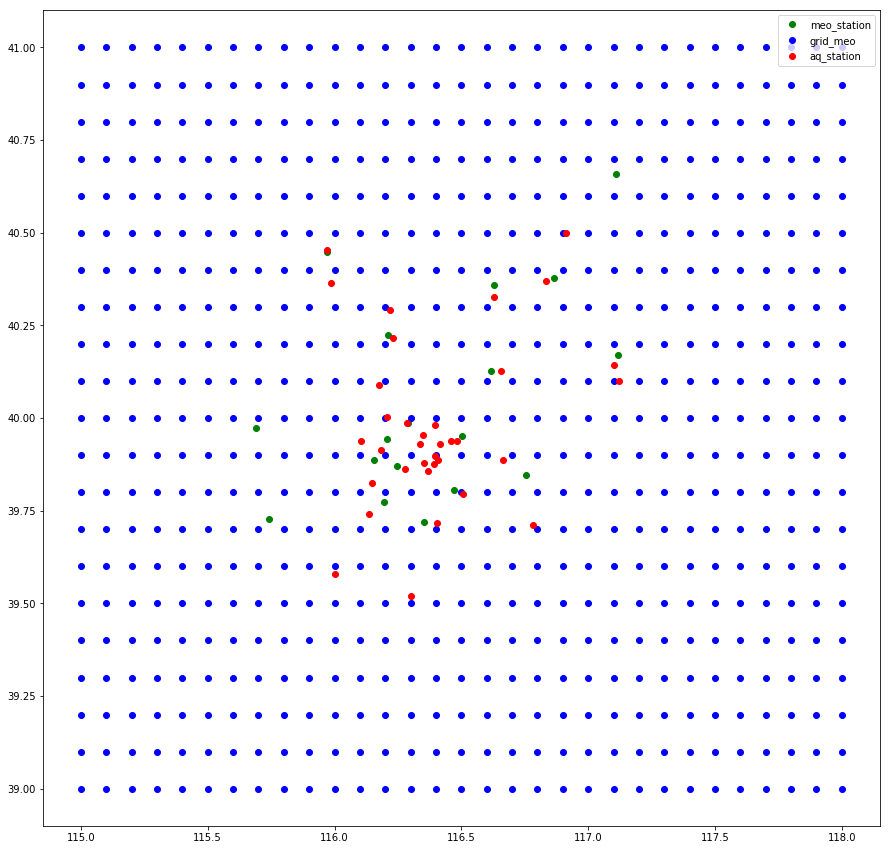

In [11]:
plt.rc('figure', figsize=(15, 15));
plt.plot(meo_locations_longitudes, meo_locations_latitudes, 'go', label='meo_station');
plt.plot(grid_meo_locations_longitudes, grid_meo_locations_latitudes, 'bo', label='grid_meo');
plt.plot(aq_locations_longitudes, aq_locations_latitudes, 'ro', label='aq_station');
plt.legend();

summary:
(1)共35个空气质量站点（红色）， 18个观测站点， 651个网格气象站点；
(2)可以看出，在每个红色站点附近都有与之最为相近的网格气象战点，因此将与每个空气质量站点最为相近的网格气象站点的特征插值作为其特征。

# 2. 距离空气质量站点最为相近的网格天气站点

In [12]:
aq_station_nearst_grid_meo_station = {}
stations = grid_meo_locations
for aq_station in aq_locations:
    nearest_grid_station_name = find_nearst_meo_station_name(aq_station, stations)
    aq_station_nearst_grid_meo_station[aq_station[0]] = nearest_grid_station_name

In [13]:
# 距离空气质量站点最为相近的网格天气站点
aq_station_nearst_grid_meo_station

{'aotizhongxin_aq': 'beijing_grid_304',
 'badaling_aq': 'beijing_grid_224',
 'beibuxinqu_aq': 'beijing_grid_263',
 'daxing_aq': 'beijing_grid_301',
 'dingling_aq': 'beijing_grid_265',
 'donggaocun_aq': 'beijing_grid_452',
 'dongsi_aq': 'beijing_grid_303',
 'dongsihuan_aq': 'beijing_grid_324',
 'fangshan_aq': 'beijing_grid_238',
 'fengtaihuayuan_aq': 'beijing_grid_282',
 'guanyuan_aq': 'beijing_grid_282',
 'gucheng_aq': 'beijing_grid_261',
 'huairou_aq': 'beijing_grid_349',
 'liulihe_aq': 'beijing_grid_216',
 'mentougou_aq': 'beijing_grid_240',
 'miyun_aq': 'beijing_grid_392',
 'miyunshuiku_aq': 'beijing_grid_414',
 'nansanhuan_aq': 'beijing_grid_303',
 'nongzhanguan_aq': 'beijing_grid_324',
 'pingchang_aq': 'beijing_grid_264',
 'pinggu_aq': 'beijing_grid_452',
 'qianmen_aq': 'beijing_grid_303',
 'shunyi_aq': 'beijing_grid_368',
 'tiantan_aq': 'beijing_grid_303',
 'tongzhou_aq': 'beijing_grid_366',
 'wanliu_aq': 'beijing_grid_283',
 'wanshouxigong_aq': 'beijing_grid_303',
 'xizhimenbei_